In [1]:
import pandas as pd
import numpy as np

In [2]:
import zipfile

In [3]:
from zipfile import ZipFile

In [4]:
x = ZipFile('archive (2).zip')

In [5]:
x.extractall('C:\\Users\\shubh\\Documents\\Tableau')

In [6]:
c = pd.read_csv(r"C:\Users\shubh\Documents\Tableau\churn_data.csv")

In [7]:
cd = pd.read_csv(r"C:\Users\shubh\Documents\Tableau\customer_data.csv")

In [8]:
id = pd.read_csv(r"C:\Users\shubh\Documents\Tableau\internet_data.csv")

https://www.kaggle.com/ashydv/telecom-churn-prediction-logistic-regression

In [9]:
c

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...
7037,2569-WGERO,72,Yes,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,24,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [10]:
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation

import matplotlib.pyplot as plt 
import seaborn as sns

In [11]:
df_1 = pd.merge(c, cd, how='inner', on='customerID')

In [12]:
telecom = pd.merge(df_1, id, how='inner', on='customerID')

In [13]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [14]:
telecom.shape

(7042, 21)

In [15]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7042 entries, 0 to 7041
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7042 non-null   object 
 1   tenure            7042 non-null   int64  
 2   PhoneService      7042 non-null   object 
 3   Contract          7042 non-null   object 
 4   PaperlessBilling  7042 non-null   object 
 5   PaymentMethod     7042 non-null   object 
 6   MonthlyCharges    7042 non-null   float64
 7   TotalCharges      7042 non-null   object 
 8   Churn             7042 non-null   object 
 9   gender            7042 non-null   object 
 10  SeniorCitizen     7042 non-null   int64  
 11  Partner           7042 non-null   object 
 12  Dependents        7042 non-null   object 
 13  MultipleLines     7042 non-null   object 
 14  InternetService   7042 non-null   object 
 15  OnlineSecurity    7042 non-null   object 
 16  OnlineBackup      7042 non-null   object 


In [16]:
# Checking Null values
telecom.isnull().sum()*100/telecom.shape[0]
# There are no NULL values in the dataset, hence it is clean.

customerID          0.0
tenure              0.0
PhoneService        0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
dtype: float64

In [17]:
telecom['TotalCharges'].describe()

count     7042
unique    6530
top           
freq        11
Name: TotalCharges, dtype: object

In [18]:
telecom['TotalCharges'] = telecom['TotalCharges'].replace(' ', np.nan)
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'])

In [19]:
value = (telecom['TotalCharges']/telecom['MonthlyCharges']).median()*telecom['MonthlyCharges']

In [20]:
telecom['TotalCharges'] = value.where(telecom['TotalCharges'] == np.nan, other =telecom['TotalCharges'])

In [21]:
telecom['TotalCharges'].describe()

count    7031.000000
mean     2282.651714
std      2266.279660
min        18.800000
25%       401.400000
50%      1397.300000
75%      3793.050000
max      8684.800000
Name: TotalCharges, dtype: float64

In [22]:
telecom.Churn.describe()

count     7042
unique       2
top         No
freq      5173
Name: Churn, dtype: object

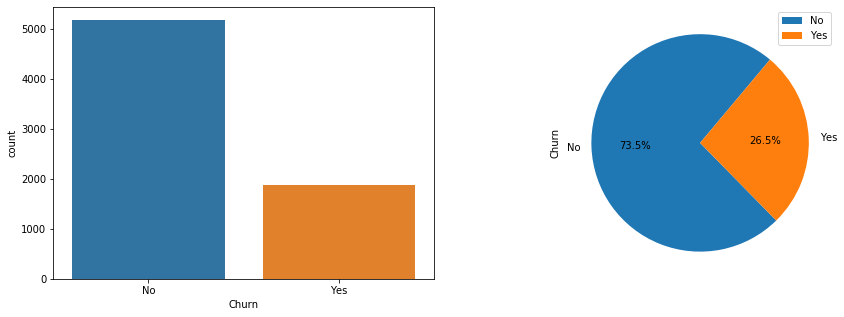

In [23]:
fig, axs = plt.subplots(1,2, figsize = (15,5))
plt1 = sns.countplot(telecom['Churn'], ax = axs[0])

pie_churn = pd.DataFrame(telecom['Churn'].value_counts())
pie_churn.plot.pie( subplots=True,labels = pie_churn.index.values, autopct='%1.1f%%', figsize = (15,5), startangle= 50, ax = axs[1])
# Unsquish the pie.
plt.gca().set_aspect('equal')

plt.show()

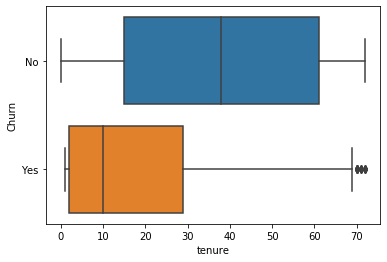

In [24]:
sns.boxplot(x = 'tenure', y = 'Churn', data = telecom)
plt.show()

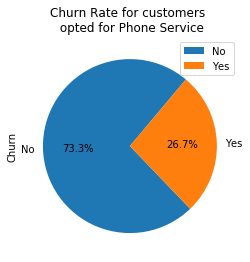

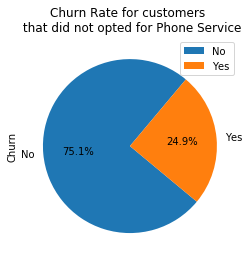

In [25]:
pie_PhoneService_Yes = pd.DataFrame(telecom[telecom['PhoneService'] == "Yes"]['Churn'].value_counts())
pie_PhoneService_Yes.plot.pie(subplots=True, labels = pie_PhoneService_Yes.index.values, autopct='%1.1f%%', startangle= 50 )
plt.title('Churn Rate for customers \n opted for Phone Service')
plt.gca().set_aspect('equal')

pie_PhoneService_No = pd.DataFrame(telecom[telecom['PhoneService'] == "No"]['Churn'].value_counts())
pie_PhoneService_No.plot.pie(subplots=True, labels = pie_PhoneService_Yes.index.values, autopct='%1.1f%%', startangle= 50)
plt.title('Churn Rate for customers \n that did not opted for Phone Service')
plt.gca().set_aspect('equal')

plt.show() 


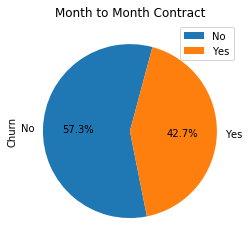

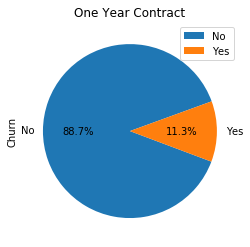

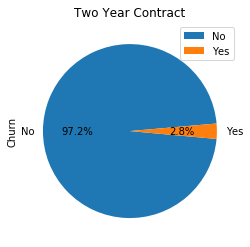

In [26]:
pie_Contract_m2m = pd.DataFrame(telecom[telecom['Contract'] == "Month-to-month"]['Churn'].value_counts())
pie_Contract_m2m.plot.pie(subplots=True, labels = pie_Contract_m2m.index.values, autopct='%1.1f%%', startangle= 75)
plt.title('Month to Month Contract')
plt.gca().set_aspect('equal')

pie_Contract_1y = pd.DataFrame(telecom[telecom['Contract'] == "One year"]['Churn'].value_counts())
pie_Contract_1y.plot.pie(subplots=True, labels = pie_Contract_1y.index.values, autopct='%1.1f%%', startangle= 20)
plt.title('One Year Contract')
plt.gca().set_aspect('equal')

pie_Contract_2y = pd.DataFrame(telecom[telecom['Contract'] == "Two year"]['Churn'].value_counts())
pie_Contract_2y.plot.pie(subplots=True, labels = pie_Contract_2y.index.values, autopct='%1.1f%%', startangle= 5)
plt.title('Two Year Contract')
plt.gca().set_aspect('equal')

plt.show()

<Figure size 1080x360 with 0 Axes>

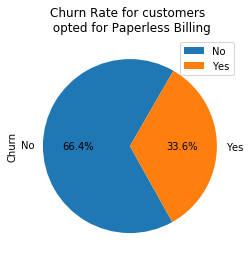

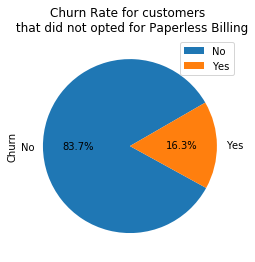

In [27]:
plt.figure(figsize=(15,5))

pie_PaperlessBilling_Yes = pd.DataFrame(telecom[telecom['PaperlessBilling'] == "Yes"]['Churn'].value_counts())
pie_PaperlessBilling_Yes.plot.pie(subplots=True, labels = pie_PaperlessBilling_Yes.index.values, autopct='%1.1f%%', startangle= 60)
plt.title('Churn Rate for customers \n opted for Paperless Billing')
plt.gca().set_aspect('equal')


pie_PaperlessBilling_No = pd.DataFrame(telecom[telecom['PaperlessBilling'] == "No"]['Churn'].value_counts())
pie_PaperlessBilling_No.plot.pie(subplots=True, labels = pie_PaperlessBilling_No.index.values, autopct='%1.1f%%', startangle= 30)
plt.title('Churn Rate for customers \n that did not opted for Paperless Billing')
plt.gca().set_aspect('equal')

plt.show()

In [28]:
telecom.PaymentMethod.describe()


count                 7042
unique                   4
top       Electronic check
freq                  2365
Name: PaymentMethod, dtype: object

<Figure size 1080x720 with 0 Axes>

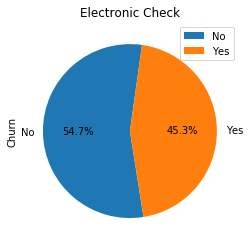

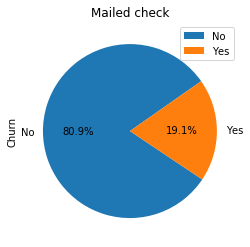

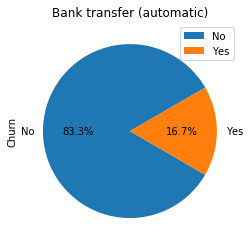

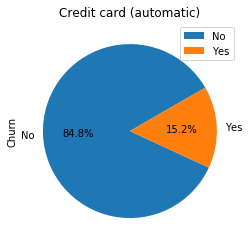

In [29]:
plt.figure(figsize=(15,10))
pie_PaymentMethod_ec = pd.DataFrame(telecom[telecom['PaymentMethod'] == "Electronic check"]['Churn'].value_counts())
pie_PaymentMethod_ec.plot.pie(subplots=True, labels = pie_PaymentMethod_ec.index.values, autopct='%1.1f%%', startangle= 82)
plt.title('Electronic Check')
plt.gca().set_aspect('equal')

pie_PaymentMethod_mc = pd.DataFrame(telecom[telecom['PaymentMethod'] == "Mailed check"]['Churn'].value_counts())
pie_PaymentMethod_mc.plot.pie(subplots=True, labels = pie_PaymentMethod_mc.index.values, autopct='%1.1f%%', startangle= 35)
plt.title('Mailed check')
plt.gca().set_aspect('equal')

pie_PaymentMethod_bta = pd.DataFrame(telecom[telecom['PaymentMethod'] == "Bank transfer (automatic)"]['Churn'].value_counts())
pie_PaymentMethod_bta.plot.pie(subplots=True, labels = pie_PaymentMethod_bta.index.values, autopct='%1.1f%%', startangle= 30)
plt.title('Bank transfer (automatic)')
plt.gca().set_aspect('equal')

pie_PaymentMethod_cca = pd.DataFrame(telecom[telecom['PaymentMethod'] == "Credit card (automatic)"]['Churn'].value_counts())
pie_PaymentMethod_cca.plot.pie(subplots=True, labels = pie_PaymentMethod_cca.index.values, autopct='%1.1f%%', startangle= 30)
plt.title('Credit card (automatic)')
plt.gca().set_aspect('equal')

plt.show()

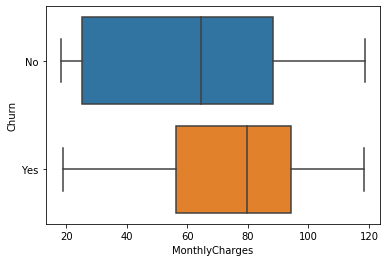

In [30]:
sns.boxplot(x = 'MonthlyCharges', y = 'Churn', data = telecom)
plt.show()

In [31]:
# We have created dummies for the below variables, so we can drop them
telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

In [32]:
# Checking for outliers in the continuous variables
num_telecom = telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

In [33]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_telecom.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7042.000000,7042.000000,7042.000000,7031.000000
mean,32.366373,64.755886,0.162170,2282.651714
std,24.557955,30.088238,0.368633,2266.279660
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.400000
50%,29.000000,70.350000,0.000000,1397.300000
75%,55.000000,89.850000,0.000000,3793.050000
90%,69.000000,102.600000,1.000000,5974.300000
95%,72.000000,107.400000,1.000000,6923.800000
99%,72.000000,114.729500,1.000000,8039.940000


In [34]:
# Adding up the missing values (column-wise)
telecom.isnull().sum()

customerID           0
tenure               0
PhoneService         0
PaperlessBilling     0
MonthlyCharges       0
TotalCharges        11
Churn                0
SeniorCitizen        0
Partner              0
Dependents           0
dtype: int64

In [35]:
# Checking the percentage of missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID          0.00
tenure              0.00
PhoneService        0.00
PaperlessBilling    0.00
MonthlyCharges      0.00
TotalCharges        0.16
Churn               0.00
SeniorCitizen       0.00
Partner             0.00
Dependents          0.00
dtype: float64

In [36]:
# Removing NaN TotalCharges rows
telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [37]:
# Checking percentage of missing values after removing the missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID          0.0
tenure              0.0
PhoneService        0.0
PaperlessBilling    0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
dtype: float64

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
# Putting feature variable to X
X = telecom.drop(['Churn','customerID'], axis=1)

X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents
0,1,No,Yes,29.85,29.85,0,Yes,No
1,34,Yes,No,56.95,1889.50,0,No,No
2,2,Yes,Yes,53.85,108.15,0,No,No
3,45,No,No,42.30,1840.75,0,No,No
4,2,Yes,Yes,70.70,151.65,0,No,No


In [40]:
# Putting response variable to y
y = telecom['Churn']

y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [41]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()

X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])

X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents
879,0.032381,Yes,Yes,-0.333459,-0.269045,0,No,No
5789,-0.293230,Yes,No,-1.491062,-0.793442,0,No,No
5008,-1.066555,Yes,No,-1.496045,-0.951355,0,No,No
880,-0.903749,Yes,Yes,1.508408,-0.543097,0,No,No
2784,-1.147957,Yes,Yes,1.109808,-0.828210,0,No,Yes


In [ ]:
### Checking the Churn Rate
churn = (sum(telecom['Churn'])/len(telecom['Churn'].index))*100
churn

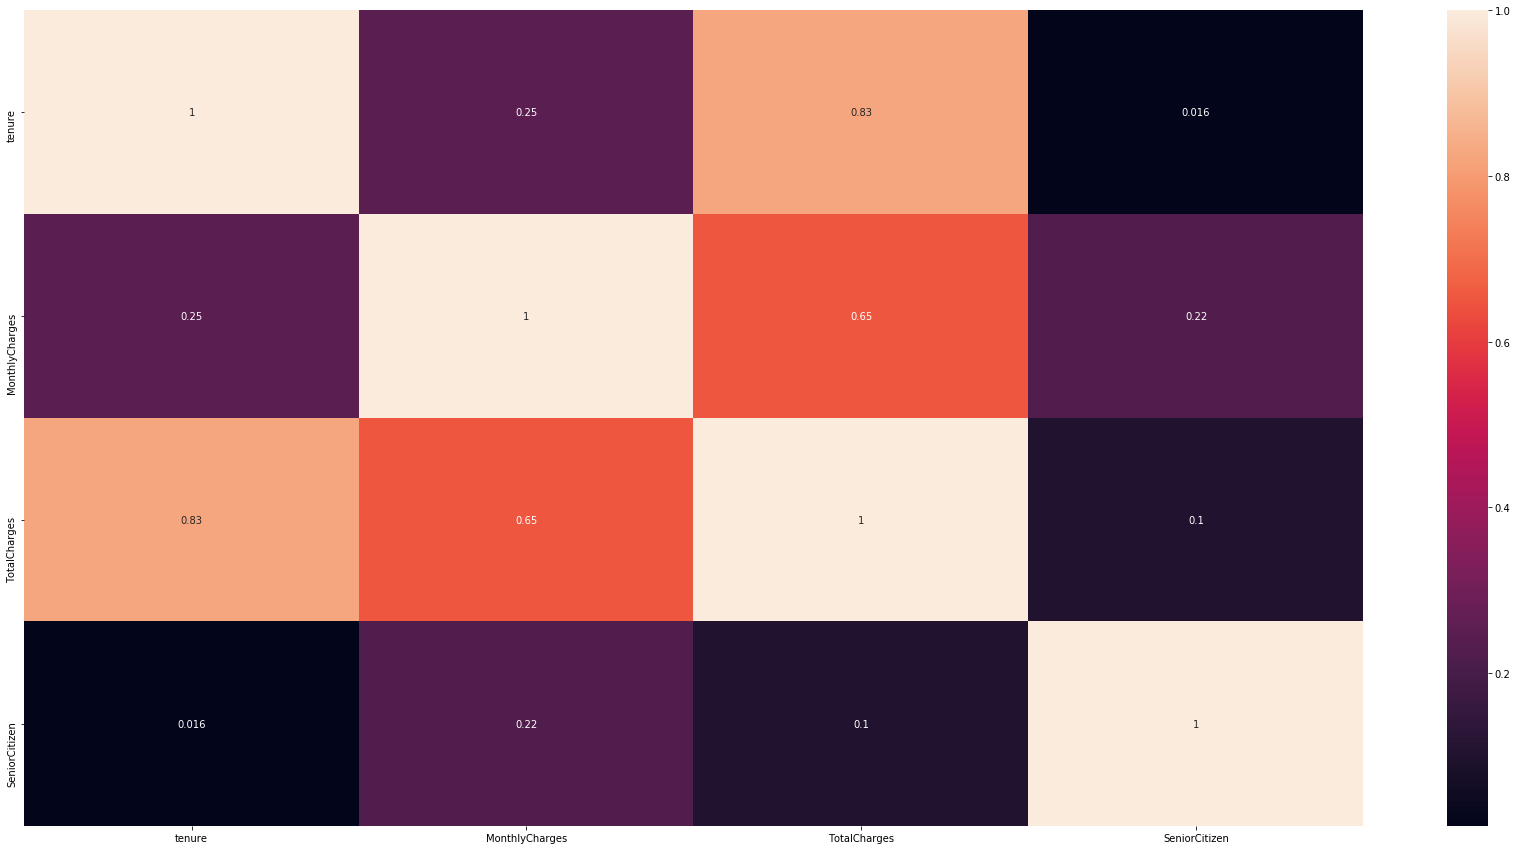

In [46]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,15))        # Size of the figure
sns.heatmap(telecom.corr(),annot = True)
plt.show()

In [ ]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [ ]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))


In [ ]:
col = X_train.columns[rfe.support_]

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

In [ ]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

In [ ]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

In [ ]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

In [ ]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

In [50]:
from sklearn import metrics

In [51]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

NameError: name 'y_train_pred_final' is not defined

In [ ]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [52]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

NameError: name 'col' is not defined

In [53]:
col = col.drop('PhoneService', 1)
col

NameError: name 'col' is not defined

In [ ]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

In [ ]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [ ]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [ ]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

In [ ]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# Let's drop TotalCharges since it has a high VIF
col = col.drop('TotalCharges')
col

In [ ]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

In [ ]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [ ]:
y_train_pred[:10]

In [ ]:
y_train_pred_final['Churn_Prob'] = y_train_pred


In [ ]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

In [ ]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

In [ ]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False
)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

In [ ]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [ ]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()